In [2]:
# Instalar - pipenv install scikit-learn scipy pandas matplotlib seaborn ipykernel gradio

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Abrir o dataset
df_colesterol = pd.read_csv('./dataset/dataset_colesterol.csv')

In [4]:
df_colesterol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1000 non-null   int64  
 1   Grupo Sanguíneo     996 non-null    object 
 2   Fumante             997 non-null    object 
 3   Nível de Atividade  996 non-null    object 
 4   Idade               997 non-null    float64
 5   Peso                997 non-null    float64
 6   Altura              997 non-null    float64
 7   Colesterol          1000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 62.6+ KB


In [5]:
# Remover do dataframe a coluna ID, pois não é útil par ao modelo de predição.
# Executanto a linha acima, o campo "Id" terá sumido.
df_colesterol.drop(columns=['Id'], axis=1, inplace=True)

In [6]:
# Normalizar o dataframe para que esteja tudo em minúscula e sem acentos.
# Renomear as colunas.
df_colesterol.columns = ['grupo_sanguineo',
                         'fumante',
                         'nivel_atividade_fisica',
                         'idade',
                         'peso',
                         'altura',
                         'nivel_colesterol']

In [7]:
# Bucketing - transformar uma varíavel númerica em uma variável categórica.
# Copiar dataframe para o dataframe EDA.
df_colesterol_eda = df_colesterol.copy()

In [8]:
# Copiar dataframe para dataframe Bucketing.
df_colesterol_bucketing = df_colesterol.copy()

### EDA

In [9]:
# Visualizar os dados
df_colesterol_eda.head(10)

,grupo_sanguineo,fumante,nivel_atividade_fisica,idade,peso,altura,nivel_colesterol
0,B,Sim,Baixo,33.0,85.1,186.0,199.63
1,A,Não,Moderado,68.0,105.0,184.0,236.98
2,O,Não,Alto,25.0,64.8,180.0,161.79
3,A,Não,Alto,43.0,120.2,167.0,336.24
4,AB,Não,Baixo,79.0,88.5,175.0,226.23
5,B,Não,Baixo,68.0,66.8,170.0,185.31
6,A,Sim,Baixo,60.0,117.3,181.0,289.33
7,O,Sim,Moderado,35.0,86.9,174.0,216.48
8,O,Não,Baixo,62.0,81.3,166.0,235.30
9,B,Sim,Alto,44.0,32.7,165.0,97.79


In [10]:
# Para identificar os tipos de grupos sanguíneos citados no dataframe.
# É possível verificar a existência de valores nulos "nan".
df_colesterol_eda.grupo_sanguineo.unique()


array(['B', 'A', 'O', 'AB', nan], dtype=object)

In [11]:
df_colesterol_eda.fumante.unique()

array(['Sim', 'Não', nan], dtype=object)

In [12]:
df_colesterol_eda.nivel_atividade_fisica.unique()

array(['Baixo', 'Moderado', 'Alto', nan], dtype=object)

In [18]:
# Detectar valores ausentes
df_colesterol_eda.isna().sum()

grupo_sanguineo           0
fumante                   0
nivel_atividade_fisica    0
idade                     0
peso                      0
altura                    0
nivel_colesterol          0
dtype: int64

In [14]:
# Medidas estatísticas do dataframe.
# Média "mean" de 49.20
# A mediana está bem próximo a média "49.00"
df_colesterol_eda.describe()

,idade,peso,altura,nivel_colesterol
count,997.000000,997.000000,997.000000,1000.000000
mean,49.206620,76.496690,174.889669,199.453260
std,17.476704,21.439132,8.844703,50.625152
min,20.000000,15.400000,160.000000,36.260000
25%,34.000000,61.700000,167.000000,166.345000
50%,49.000000,75.500000,175.000000,199.455000
75%,65.000000,90.200000,183.000000,233.785000
max,79.000000,158.100000,190.000000,372.670000


In [15]:
# Coletar todas as medidas (moda) das variáveis categóricas.
# Coletar a mediana das variáveis numéricas.

# Coletar medidas das variáveis categóricas
moda_grupo_sang = df_colesterol_eda.grupo_sanguineo.mode()
moda_fumante = df_colesterol_eda.fumante.mode()
moda_nivel_atividade = df_colesterol_eda.nivel_atividade_fisica.mode()

In [16]:
# Coletar medidas das variáveis numéricas.
mediana_idade = df_colesterol_eda.idade.median()
mediana_peso = df_colesterol_eda.peso.median()
mediana_altura = df_colesterol_eda.altura.median()

In [17]:
# Input dos valores ausentes.
# Moda, pode se ter uma varíavel com mais de uma moda, dessa forma o Python cria um indice.
# Então deve-se colocar o indice na variável moda.
# Rodar novamente "df_colesterol_eda.isna().sum()" será possível verificar que não existem mais valores zerados.

df_colesterol_eda.fillna(value={'grupo_sanguineo': moda_grupo_sang[0],
                                'fumante': moda_fumante[0],
                                'nivel_atividade_fisica': moda_nivel_atividade[0],
                                'idade': mediana_idade,
                                'peso': mediana_peso,
                                'altura': mediana_altura}, inplace=True)

In [19]:
# Converter idade e altura para inteiro
df_colesterol_eda.idade = df_colesterol_eda.idade.astype(int)

In [20]:
df_colesterol_eda.altura = df_colesterol_eda.altura.astype(int)

In [30]:
# Estrutura do dataframe
# As colunas com o tipo "object" podem ser consideradas como categóricas.
df_colesterol_eda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 963 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   grupo_sanguineo         963 non-null    object 
 1   fumante                 963 non-null    object 
 2   nivel_atividade_fisica  963 non-null    object 
 3   idade                   963 non-null    int64  
 4   peso                    963 non-null    float64
 5   altura                  963 non-null    int64  
 6   nivel_colesterol        963 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 60.2+ KB


In [22]:
# Visualizar os dados
df_colesterol_eda.head(10)

,grupo_sanguineo,fumante,nivel_atividade_fisica,idade,peso,altura,nivel_colesterol
0,B,Sim,Baixo,33,85.1,186,199.63
1,A,Não,Moderado,68,105.0,184,236.98
2,O,Não,Alto,25,64.8,180,161.79
3,A,Não,Alto,43,120.2,167,336.24
4,AB,Não,Baixo,79,88.5,175,226.23
5,B,Não,Baixo,68,66.8,170,185.31
6,A,Sim,Baixo,60,117.3,181,289.33
7,O,Sim,Moderado,35,86.9,174,216.48
8,O,Não,Baixo,62,81.3,166,235.30
9,B,Sim,Alto,44,32.7,165,97.79


<Axes: xlabel='idade'>

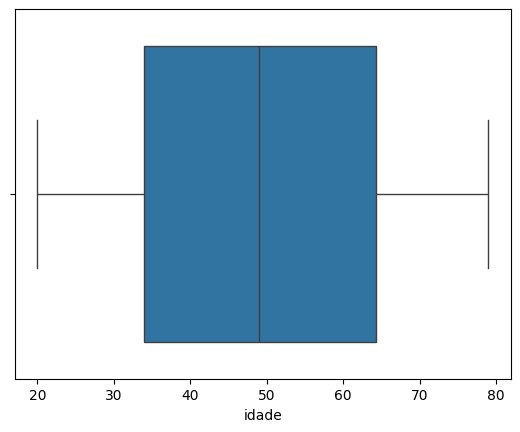

In [23]:
# Verificar / detectar Outliers
sns.boxplot(data=df_colesterol_eda, x='idade')

<Axes: xlabel='peso'>

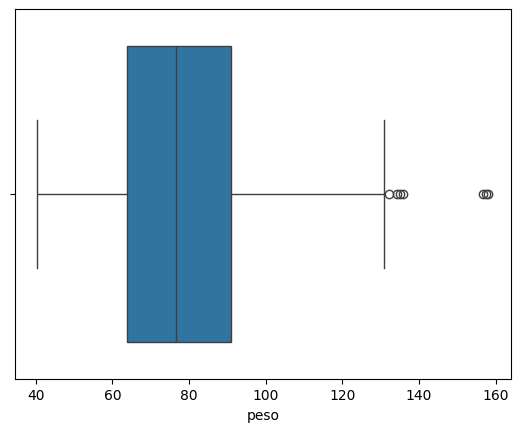

In [31]:
sns.boxplot(data=df_colesterol_eda, x='peso')

In [26]:
# Filtrar o público a ser removido.
df_colesterol_eda[df_colesterol_eda['peso'] < 40]

,grupo_sanguineo,fumante,nivel_atividade_fisica,idade,peso,altura,nivel_colesterol
9,B,Sim,Alto,44,32.7,165,97.79
26,AB,Não,Alto,47,24.8,168,72.62
71,AB,Não,Alto,63,35.2,178,91.63
73,A,Não,Baixo,50,36.5,167,109.60
74,O,Sim,Moderado,43,34.5,161,111.93
79,O,Não,Moderado,45,38.1,161,120.96
87,O,Não,Alto,38,37.5,188,84.80
143,O,Não,Moderado,58,38.0,173,107.50
175,A,Não,Alto,28,37.2,166,108.82
267,A,Não,Moderado,72,36.8,165,112.05


In [27]:
df_colesterol_eda[df_colesterol_eda['peso'] < 40].peso.count()

np.int64(37)

In [29]:
# Remover público do dataframe.
df_colesterol_eda.drop(df_colesterol_eda[df_colesterol_eda['peso'] < 40].index, axis=0, inplace=True)

<Axes: xlabel='altura'>

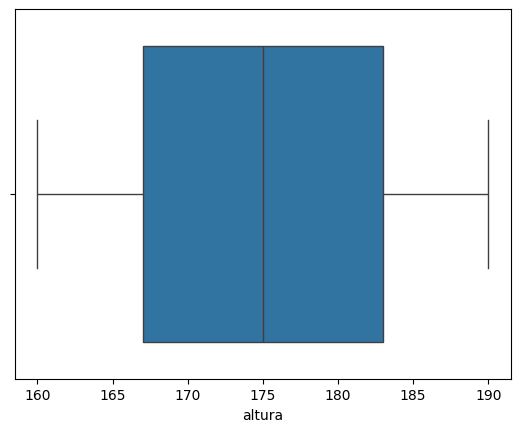

In [33]:
sns.boxplot(data=df_colesterol_eda, x='altura')

<Axes: xlabel='nivel_colesterol'>

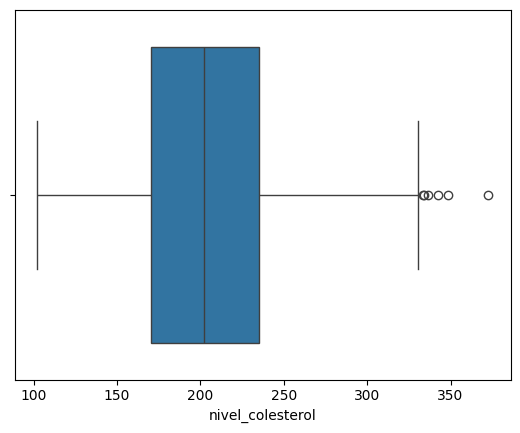

In [34]:
sns.boxplot(data=df_colesterol_eda, x='nivel_colesterol')